<a href="https://colab.research.google.com/github/atanuGuin/Computer_Vision_Coursework/blob/master/YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#clone darknet repository
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.17 MiB | 15.21 MiB/s, done.
Resolving deltas: 100% (10403/10403), done.


In [1]:
!nvidia-smi

Wed Feb 15 06:26:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!pwd
%cd darknet
!pwd

/content
/content/darknet
/content/darknet


In [12]:
#go to the darknet folder, edit and remake Makefiles of GPU and OPENCV
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 0)
      |             ^~
./src/image_opencv.cpp:1150

In [13]:
# get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2023-02-15 06:36:09--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  17.7MB/s    in 15s     

2023-02-15 06:36:24 (16.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [14]:

!pwd

/content/darknet


In [15]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libvorbis-dev is already the newest version (1.3.6-2ubuntu1).
libvorbis-dev set to manually installed.
libdc1394-22 is already the newest version (2.2.5-2.1).
libdc1394-22 set to manually installed.
libdc1394-22-dev is already the newest version (2.2.5-2.1).
libdc1394-22-dev set to manually installed.
libtbb-dev is already the newest version (2020.1-2).
libtbb-dev set to manually installed.
python3-numpy is already the newest version (1:1.17.4-5ubuntu3.1).
python3-numpy set to manually installed.
unzip is already the newest version (6.0-25ubuntu1.1).
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
libavcodec-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:4.2.7-0ubuntu0.1).
libavformat-dev

In [19]:
# img2 = '/content/drive/MyDrive/Demo/dogs.jpeg'

In [25]:
!./darknet detect cfg/yolov3.cfg yolov3.weights /content/dogs.jpeg

 CUDA-version: 11060 (11060), GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 1

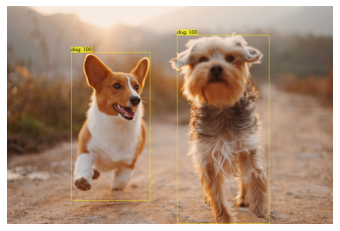

In [26]:
import cv2
import matplotlib.pyplot as plt
import os.path
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([])
ax.axis('off')
file = './predictions.jpg'
if os.path.exists(file):
    img = cv2.imread(file)
    show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #show_img(show_img)
    plt.imshow(show_img)
    plt.show()
#cv2.imshow(img)